In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = list(range(10))

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.4622 - accuracy: 0.8791
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3036 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2662 - accuracy: 0.9258


In [6]:
model_loss, model_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f"Model Loss: {model_loss:.1f}")
print(f"Model Accuray:{model_acc*100:.1f}%")

313/313 - 1s - loss: 0.2653 - accuracy: 0.9261 - 519ms/epoch - 2ms/step
Model Loss: 0.3
Model Accuray:92.6%


313/313 [==============================] - 1s 3ms/step


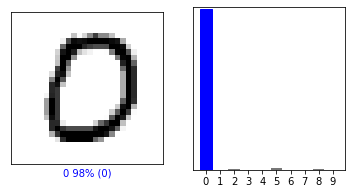

In [7]:
class_names = list(range(10))
predictions = model.predict(x_test)
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

313/313 [==============================] - 1s 3ms/step


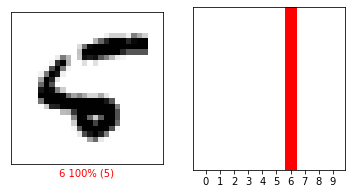

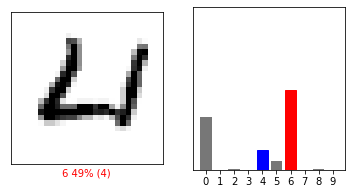

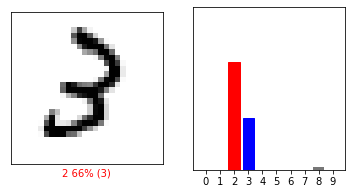

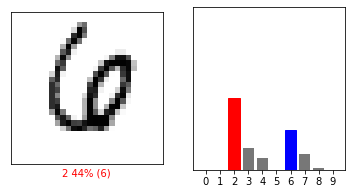

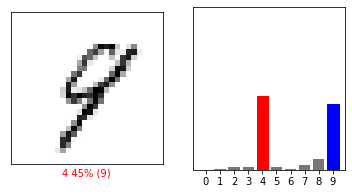

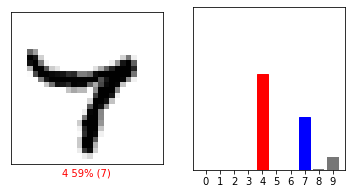

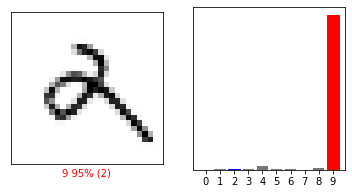

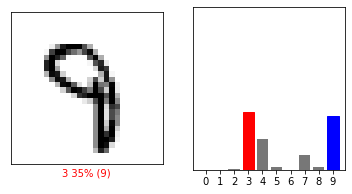

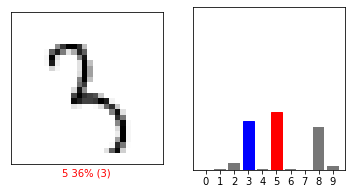

In [8]:
class_names = list(range(10))
predictions = model.predict(x_test)
count = 0
for i in range(len(predictions)):
  if y_test[i] != np.argmax(predictions[i]):
    count+=1
    if count > 9:
      break
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  y_test)
    plt.show()

313/313 [==============================] - 0s 1ms/step


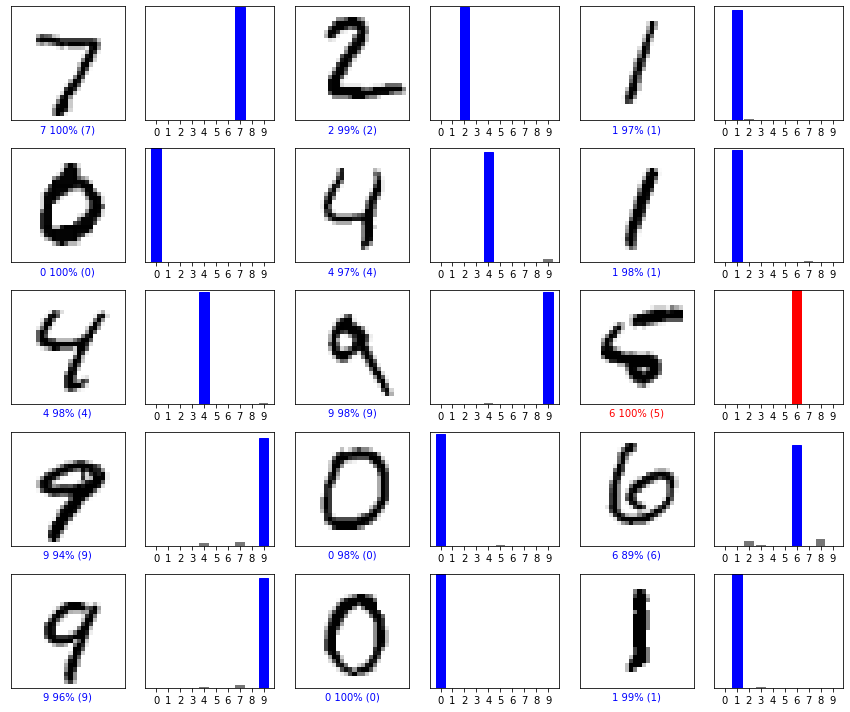

In [9]:
class_names = list(range(10))
predictions = model.predict(x_test)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

wefsfdsf

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 15ms/step
[[2.0336239e-04 2.5538416e-06 9.9190450e-01 2.8518462e-04 3.1114938e-13
  2.6473079e-03 4.8565678e-03 5.7347932e-16 1.0050861e-04 1.9063776e-12]]


2

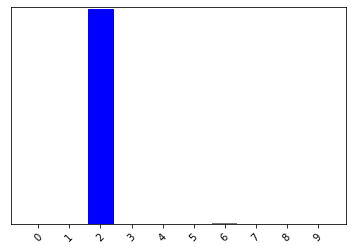

In [10]:
img = x_test[1]
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = model.predict(img)
print(predictions_single)
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])

In [11]:
model.save('my_model.h5') 

In [12]:
new_model = tf.keras.models.load_model('my_model.h5')

313/313 [==============================] - 0s 1ms/step


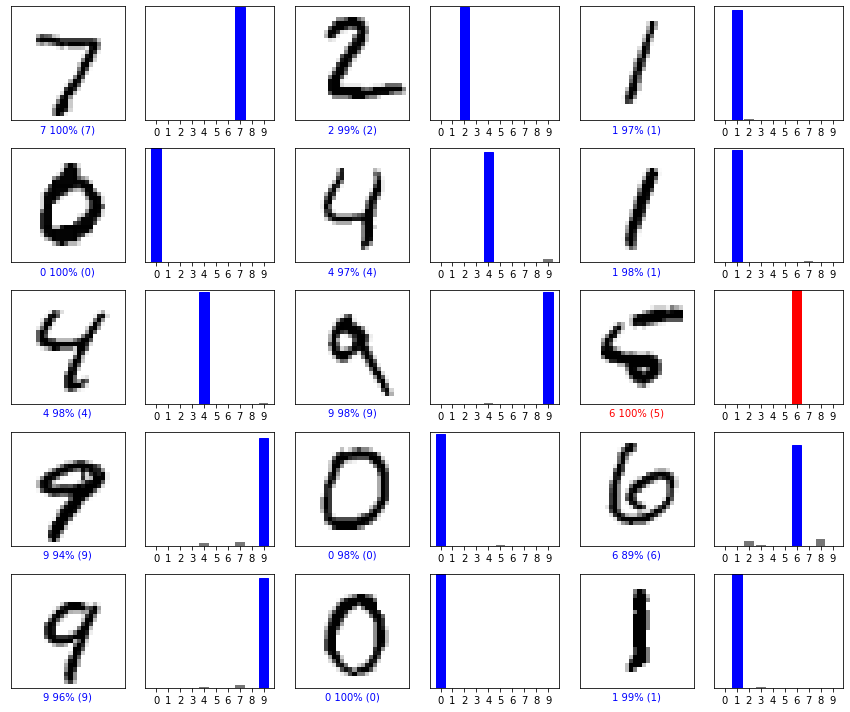

In [13]:
predictions = new_model.predict(x_test)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()